# ORIE 4741 Project

Group Members: Lu Cao, Elva Gao, Kinya Wang

Dataset Link:  https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/

## Import packages

In [33]:
from google.colab import drive
import os
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [34]:
import numpy as np

# random
import random
from numpy.random import rand, randn

# dataframes
import pandas as pd

# plotting
import matplotlib.pyplot as plt
# linear regression two ways
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

from patsy import dmatrices

import seaborn as sns

import statistics as stats

## Import data

In [35]:
feature_path = os.path.join(os.getcwd(), "drive", "My Drive", "2021 Fall", "OR4741", "or4741-main", 'DengAI_Predicting_Disease_Spread_-_Training_Data_Features.csv')
labels_path = os.path.join(os.getcwd(), "drive", "My Drive", "2021 Fall", "OR4741", "or4741-main", 'DengAI_Predicting_Disease_Spread_-_Training_Data_Labels.csv')

features = pd.read_csv(feature_path)
labels = pd.read_csv(labels_path)

# features = pd.read_csv('DengAI_Predicting_Disease_Spread_-_Training_Data_Features.csv')
# labels = pd.read_csv('DengAI_Predicting_Disease_Spread_-_Training_Data_Labels.csv')
features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [36]:
features.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,303.427109,295.719156,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,3.234601,2.565364,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,297.800000,286.900000,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,301.000000,293.900000,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,302.400000,296.200000,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,305.500000,297.900000,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,314.000000,299.900000,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


In [37]:
labels.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [38]:
labels.describe()

,year,weekofyear,total_cases
count,1456.000000,1456.000000,1456.000000
mean,2001.031593,26.503434,24.675137
std,5.408314,15.019437,43.596000
min,1990.000000,1.000000,0.000000
25%,1997.000000,13.750000,5.000000
50%,2002.000000,26.500000,12.000000
75%,2005.000000,39.250000,28.000000
max,2010.000000,53.000000,461.000000


# Data cleaning

In [39]:
# from datetime import date

# def d(s):
#   year, month, day = map(int, s.split('-'))
#   return date(year, month, day)

# def days(start, end):
#   return (d(end) - d(start)).days

In [40]:
# convert categorical features (specifically, city name) using one-hot encoding
x_df = pd.get_dummies(features['city'])
features.pop('city')
df = pd.concat([x_df, features.reindex(x_df.index)], axis=1)
# convert start date to float
# # from datetime import datetime
# # df['week_start_date']=pd.to_numeric(datetime.strptime(df['week_start_date'], format='%Y-%m-%d'))
# # df['week_start_date']= df['week_start_date']-min(df['week_start_date'])
# # df.head()
# from datetime import date
# min_date = df['week_start_date'].iloc[0]
# df['week_start_date']= df['week_start_date'].apply(lambda x: days( min_date,x))
df.head()

,iq,sj,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,0,1,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,0,1,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,0,1,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,0,1,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,0,1,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [41]:
#count number of missing values for each column
print(df.isna().sum())

iq                                         0
sj                                         0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_ma

<Figure size 864x576 with 0 Axes>

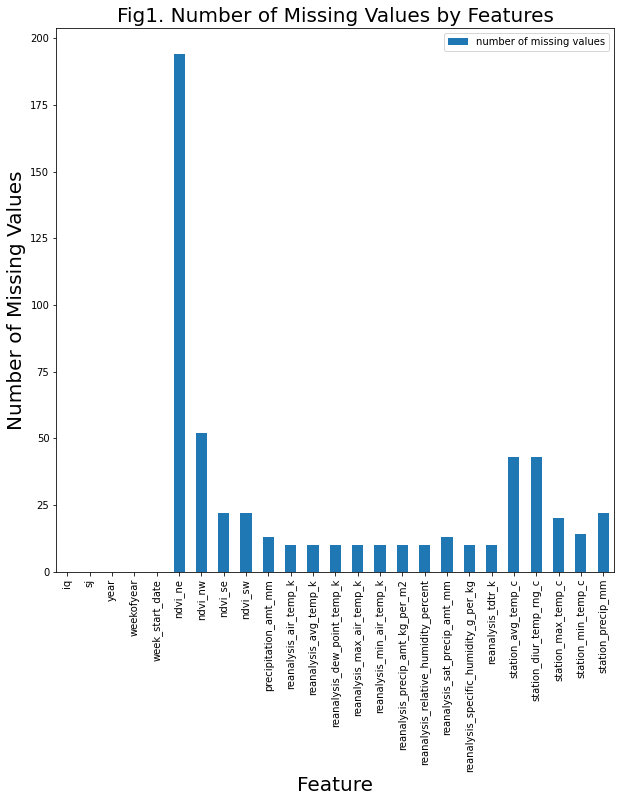

,iq,sj,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,0.357143,0.642857,2001.031593,26.503434,0.131490,0.127823,0.203130,0.201963,45.702091,298.697750,299.221723,295.244555,303.420158,295.718441,40.125594,82.173009,45.702091,16.744659,4.900618,27.181438,8.095505,32.446497,22.098043,39.362294
std,0.479322,0.479322,5.408314,15.019437,0.137272,0.119478,0.073781,0.083491,43.651356,1.359878,1.260384,1.525955,3.233153,2.559010,43.313117,7.152190,43.651356,1.540958,3.542762,1.281116,2.127521,1.959090,1.570524,47.285701
min,0.000000,0.000000,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,297.800000,286.900000,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,0.000000,0.000000,1997.000000,13.750000,0.037400,0.048092,0.154057,0.144455,9.785000,297.657857,298.257143,294.117857,301.000000,293.900000,13.200000,77.196429,9.785000,15.554643,2.328571,26.314286,6.528571,31.100000,21.100000,8.850000
50%,0.000000,1.000000,2002.000000,26.500000,0.115550,0.115926,0.195664,0.190121,38.320000,298.640000,299.285714,295.638571,302.400000,296.200000,27.300000,80.287857,38.320000,17.084286,2.857143,27.400000,7.350000,32.800000,22.200000,24.050000
75%,1.000000,1.000000,2005.000000,39.250000,0.231443,0.213429,0.247461,0.246579,70.227500,299.827500,300.207143,296.457857,305.500000,297.900000,52.200000,86.437500,70.227500,17.976071,7.632143,28.130804,9.603571,33.900000,23.300000,53.900000
max,1.000000,1.000000,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,314.000000,299.900000,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


In [42]:
#Plot
plt.figure(figsize=(12,8)) 
df.isna().sum().reset_index(name="number of missing values").plot.bar(x='index', y= "number of missing values", rot=90,figsize=(10,10))
plt.xlabel('Feature', fontsize =20)
plt.ylabel('Number of Missing Values', fontsize =20)
plt.title("Fig1. Number of Missing Values by Features", fontsize =20)
plt.show()
#impute missing values based on the avearge of the previous and next values. 
df = df.interpolate()
#drop week_start_date column
df.drop('week_start_date', axis=1, inplace=True)
df.describe()

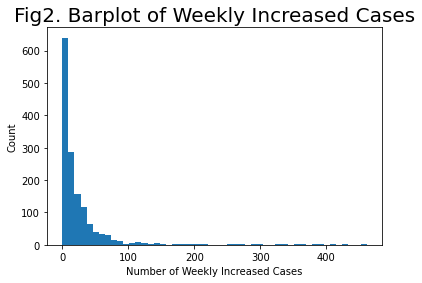

In [43]:
# # of weekly increased cases mostly under 100
plt.hist(labels['total_cases'], bins = 50)
plt.ylabel("Count")
plt.xlabel("Number of Weekly Increased Cases")
plt.title("Fig2. Barplot of Weekly Increased Cases", fontsize =20)
plt.show() 

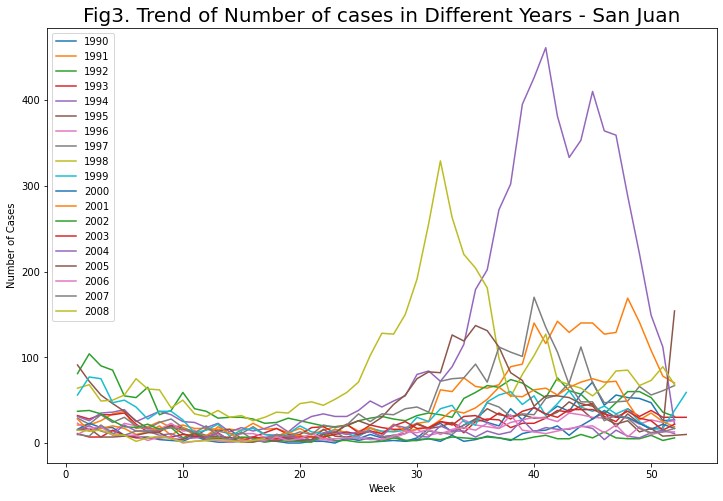

In [44]:
# trend of weeks of year
plt.figure(figsize=(12,8)) 
y_df_sj = labels[labels['city'] == 'sj']
y_df_iq = labels[labels['city'] == 'iq']
week_sj = y_df_sj['year'].unique()
week_iq = y_df_iq['year'].unique()
for week in week_sj:
    temp = y_df_sj[y_df_sj['year'] == week]
    temp = temp.sort_values(by=['weekofyear'])
    plt.plot(temp['weekofyear'], temp['total_cases'], label = week)
plt.legend()
plt.xlabel("Week")
plt.ylabel("Number of Cases")
plt.title("Fig3. Trend of Number of cases in Different Years - San Juan", fontsize =20)
plt.show()

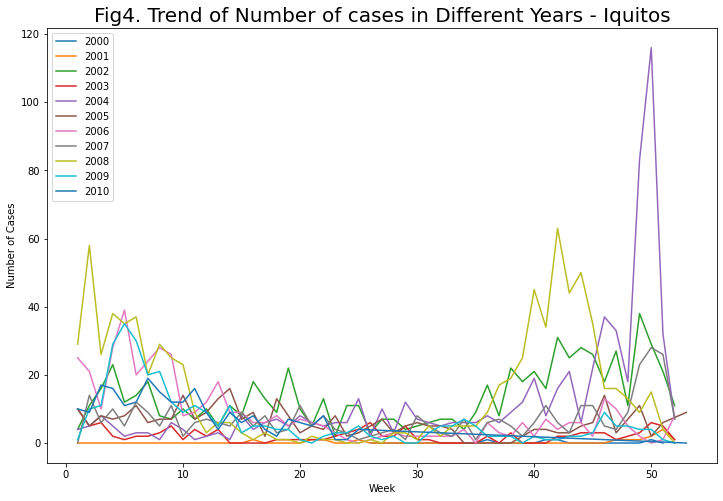

In [45]:
# trend of weeks of year
plt.figure(figsize=(12,8)) 
for week in week_iq:
    temp = y_df_iq[y_df_iq['year'] == week]
    temp = temp.sort_values(by=['weekofyear'])
    plt.plot(temp['weekofyear'], temp['total_cases'], label = week)
plt.legend()
plt.xlabel("Week")
plt.ylabel("Number of Cases")
plt.title("Fig4. Trend of Number of cases in Different Years - Iquitos", fontsize =20)
plt.show()

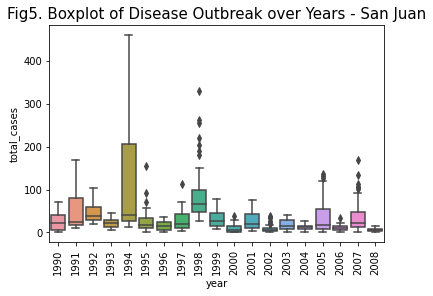

In [46]:
# sj trend over year 
ax = sns.boxplot(data = y_df_sj, x='year',y='total_cases')
for item in ax.get_xticklabels():
    item.set_rotation(90)
plt.title("Fig5. Boxplot of Disease Outbreak over Years - San Juan", fontsize =15)
plt.show()

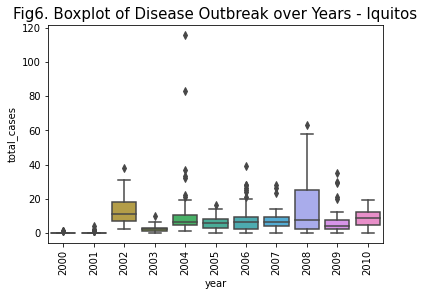

In [47]:
# iq trend over year 
ax = sns.boxplot(data = y_df_iq, x='year',y='total_cases')
for item in ax.get_xticklabels():
    item.set_rotation(90)
plt.title("Fig6. Boxplot of Disease Outbreak over Years - Iquitos", fontsize =15)
plt.show()

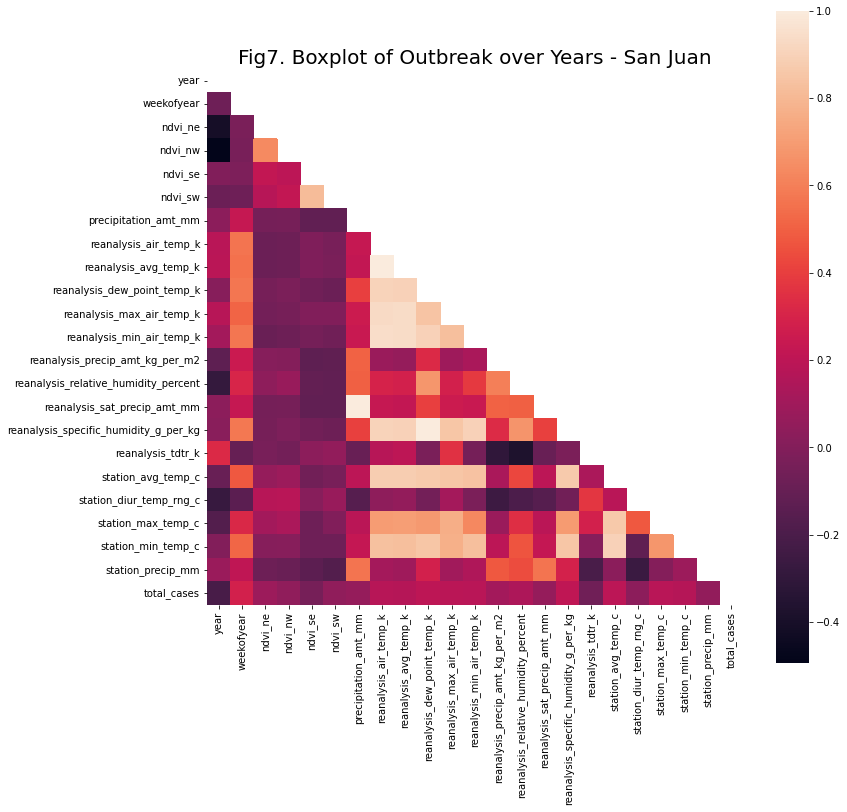

In [48]:
#heatmap of sj
df_sj = df[df['sj'] == 1]
df_sj = df_sj.drop(columns = ['iq', 'sj'])
df_sj = df_sj.merge(y_df_sj, on=['year', 'weekofyear'], how='left').drop(columns = ['city'])
corr_sj = df_sj.corr()
mask = np.triu(np.ones_like(corr_sj))
plt.figure(figsize = (12,12))
sns.heatmap(corr_sj, square=True, mask=mask)
plt.title("Fig7. Boxplot of Outbreak over Years - San Juan", fontsize =20)
plt.show()

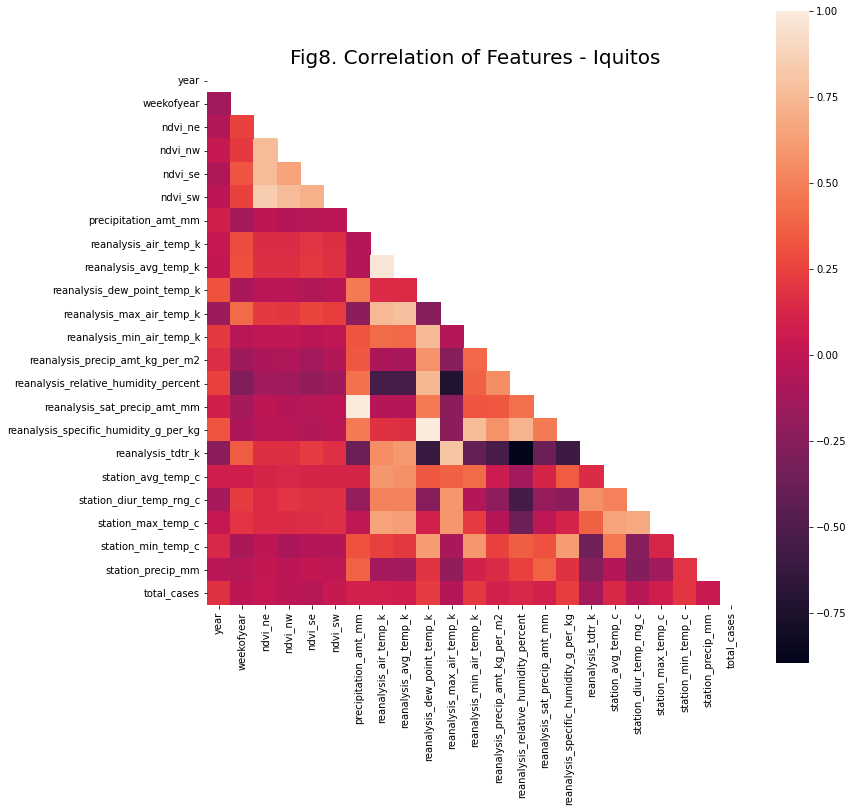

In [49]:
#heatmap of iq
df_iq = df[df['iq'] == 1]
df_iq = df_iq.drop(columns = ['iq', 'sj'])
df_iq = df_iq.merge(y_df_iq, on=['year', 'weekofyear'], how='left').drop(columns = ['city'])
corr_iq = df_iq.corr()
mask = np.triu(np.ones_like(corr_iq))
plt.figure(figsize = (12,12))
sns.heatmap(corr_iq, square=True, mask=mask)
plt.title("Fig8. Correlation of Features - Iquitos", fontsize =20) 
plt.show()

# Observation:
ndvi_ne, ndvi_nw, ndvi_se, ndvi_sw highly correlated
reanalysis_air_temp_k, reanalysis_avg_temp_k highly correlated

reanalysis_sat_precip_amt_mm, precipitation_amt_mm highly correlated


In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso, HuberRegressor, QuantileRegressor

In [51]:
Y_iq = df_iq['total_cases']
X_iq = df_iq.drop(columns = ['total_cases'])
X_iq = sm.add_constant(X_iq)
Y_sj = df_sj['total_cases']
X_sj = df_sj.drop(columns = ['total_cases'])
X_sj = sm.add_constant(X_sj)

In [52]:
xTrain_sj, xTest_sj, yTrain_sj, yTest_sj = train_test_split(X_sj, Y_sj, test_size=0.25, random_state=42)
xTrain_iq, xTest_iq, yTrain_iq, yTest_iq = train_test_split(X_iq, Y_iq, test_size=0.25, random_state=42)

# Regressions:
We want to try different regression methods with regularization to see if it can find best fitting weight

In [53]:
# quadratic loss
model_sj = sm.OLS(yTrain_sj, xTrain_sj)
model_sj = model_sj.fit()
model_sj.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_cases   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     6.328
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           1.96e-16
Time:                        06:58:39   Log-Likelihood:                -3697.3
No. Observations:                 702   AIC:                             7439.
Df Residuals:                     680   BIC:                             7539.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                  5860.2893   7924.621      0.740      0.460   -9699.378    2.14e+04
year                                     -2.3518      0.564     -4.170      0.000      -3.459      -1.244
weekofyear                                0.6442      0.165      3.901      0.000       0.320       0.968
ndvi_ne                                  58.1502     24.039      2.419      0.016      10.950     105.350
ndvi_nw                                 -74.2180     27.984     -2.652      0.008    -129.164     -19.272
ndvi_se                                -189.8401     56.299     -3.372      0.001    -300.381     -79.299
ndvi_sw                                 199.8548     58.013      3.445      0.001      85.948     313.761
precipitation_amt_mm                     -0.0219      0.027     -0.805      0.421      -0.075       0.031
reanalysis_air_temp_k                     4.8269    103.338      0.047      0.963    -198.072     207.726
reanalysis_avg_temp_k                   -44.2717     24.706     -1.792      0.074     -92.781       4.237
reanalysis_dew_point_temp_k              15.5747     97.861      0.159      0.874    -176.571     207.720
reanalysis_max_air_temp_k                15.6272      6.024      2.594      0.010       3.800      27.454
reanalysis_min_air_temp_k                 6.0543      6.206      0.976      0.330      -6.132      18.240
reanalysis_precip_amt_kg_per_m2           0.0423      0.104      0.408      0.683      -0.161       0.246
reanalysis_relative_humidity_percent     -6.5497     21.450     -0.305      0.760     -48.666      35.566
reanalysis_sat_precip_amt_mm             -0.0219      0.027     -0.805      0.421      -0.075       0.031
reanalysis_specific_humidity_g_per_kg    14.8041     26.086      0.568      0.571     -36.415      66.024
reanalysis_tdtr_k                        -1.4388      7.082     -0.203      0.839     -15.345      12.467
station_avg_temp_c                      -12.6088      6.337     -1.990      0.047     -25.051      -0.166
station_diur_temp_rng_c                  -1.3850      3.905     -0.355      0.723      -9.053       6.283
station_max_temp_c                        4.3418      3.098      1.401      0.162      -1.742      10.425
station_min_temp_c                        1.9804      3.936      0.503      0.615      -5.748       9.709
station_precip_mm                         0.0148      0.084      0.176      0.860      -0.150       0.180
==============================================================================
Omnibus:                      610.664   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14713.245
Skew:                           3.915   Prob(JB):                         0.00
Kurtosis:  

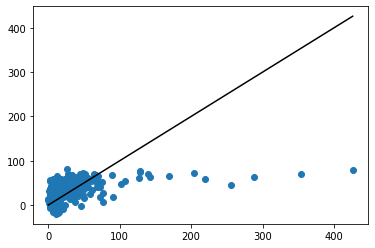

In [54]:
yPred_sj = model_sj.predict(xTest_sj)
plt.scatter(yTest_sj, yPred_sj)
x = np.linspace(0, max(max(yTest_sj), max(yPred_sj)), 10000)
plt.plot(x,x,color = "black")

In [55]:
model_iq = sm.OLS( yTrain_iq, xTrain_iq)
model_iq = model_iq.fit()
model_iq.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_cases   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     2.132
Date:                Thu, 02 Dec 2021   Prob (F-statistic):            0.00286
Time:                        06:58:39   Log-Likelihood:                -1463.2
No. Observations:                 390   AIC:                             2970.
Df Residuals:                     368   BIC:                             3058.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                  2422.3175   2024.037      1.197      0.232   -1557.812    6402.447
year                                      0.3019      0.213      1.418      0.157      -0.117       0.721
weekofyear                                0.0356      0.042      0.843      0.400      -0.047       0.119
ndvi_ne                                  12.8594     14.374      0.895      0.372     -15.407      41.125
ndvi_nw                                 -10.9743     12.214     -0.898      0.370     -34.993      13.045
ndvi_se                                 -11.6974     11.639     -1.005      0.316     -34.585      11.190
ndvi_sw                                   6.9670     12.500      0.557      0.578     -17.614      31.548
precipitation_amt_mm                     -0.0094      0.009     -1.005      0.315      -0.028       0.009
reanalysis_air_temp_k                    -1.8109      5.871     -0.308      0.758     -13.356       9.734
reanalysis_avg_temp_k                    -2.5114      2.580     -0.973      0.331      -7.586       2.563
reanalysis_dew_point_temp_k              -6.5805      7.981     -0.825      0.410     -22.275       9.114
reanalysis_max_air_temp_k                -0.2108      0.540     -0.390      0.697      -1.273       0.851
reanalysis_min_air_temp_k                 0.4529      0.762      0.594      0.553      -1.045       1.951
reanalysis_precip_amt_kg_per_m2          -0.0090      0.015     -0.590      0.556      -0.039       0.021
reanalysis_relative_humidity_percent     -1.0653      1.279     -0.833      0.405      -3.580       1.450
reanalysis_sat_precip_amt_mm             -0.0094      0.009     -1.005      0.315      -0.028       0.009
reanalysis_specific_humidity_g_per_kg    12.0346      6.676      1.803      0.072      -1.093      25.163
reanalysis_tdtr_k                         0.1204      0.877      0.137      0.891      -1.603       1.844
station_avg_temp_c                        0.3746      1.064      0.352      0.725      -1.717       2.466
station_diur_temp_rng_c                  -0.2930      0.648     -0.452      0.651      -1.567       0.981
station_max_temp_c                        0.2370      0.669      0.355      0.723      -1.078       1.552
station_min_temp_c                        0.9498      0.708      1.341      0.181      -0.443       2.342
station_precip_mm                         0.0065      0.010      0.680      0.497      -0.012       0.025
==============================================================================
Omnibus:                      398.859   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18934.286
Skew:                           4.369   Prob(JB):                         0.00
Kurtosis:  

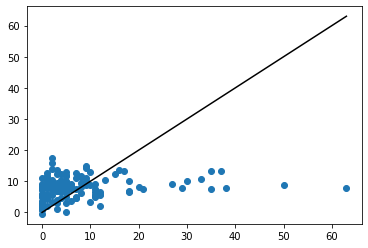

In [56]:
yPred_iq = model_iq.predict(xTest_iq)
plt.scatter(yTest_iq, yPred_iq)
x = np.linspace(0, max(max(yTest_iq), max(yPred_iq)), 10000)
plt.plot(x,x,color = "black")

In [ ]:
# from above observation: we do have outliers -> l1 regression or regularization 
# l1 regression
# alphas = np.linspace(.01,1,100)
# lasso_error = []
# for alpha in alphas:
#     yhat_lasso = Lasso(alpha = alpha).fit(xTrain_sj, yTrain_sj).predict(xTest_sj)
#     lasso_error.append(sum(yTest_sj - yhat_lasso)**2)
# min_error = min(lasso_error)
# index = lasso_error.index(min_error)     
# best_alpha = alphas[index]
# model_sj = Lasso(alpha = best_alpha).fit(xTrain_sj, yTrain_sj)
# yPred_sj = model_sj.predict(xTest_sj)
# plt.scatter(yTest_sj, yPred_sj)
# x = np.linspace(0, max(max(yTest_sj), max(yPred_sj)), 10000)
# plt.plot(x,x,color = "black")
model_sj = QuantileRegressor(quantile=.5, fit_intercept=True, alpha=0).fit(xTrain_sj, yTrain_sj)
yPred_sj = model_sj.predict(xTest_sj)
plt.scatter(yTest_sj, yPred_sj)
x = np.linspace(0, max(max(yTest_sj), max(yPred_sj)), 10000)
plt.plot(x,x,color = "black")

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [ ]:
# huber regression
model_sj = HuberRegressor().fit(xTrain_sj, yTrain_sj)
yPred_sj = model_sj.predict(xTest_sj)
plt.scatter(yTest_sj, yPred_sj)
x = np.linspace(0, max(max(yTest_sj), max(yPred_sj)), 10000)
plt.plot(x,x,color = "black")

In [ ]:
# qunatile regression
quantiles = [0.05, 0.25, 0.75, 0.95]
min_err = 0
best_model = None
for quantile in quantiles:
  model_sj = QuantileRegressor(quantile=quantile, fit_intercept=True, alpha=0).fit(xTrain_sj, yTrain_sj)
  yPred_sj = model_sj.predict(xTest_sj) 
  curr_err = sum(yTest_sj - yPred_sj)**2)
  if best_model is None:
    min_err = curr_err
    best_model = model_sj
  elif curr_err < min_err:
    min_err = curr_err
    best_model = model_sj
yPred_sj = best_model.predict(xTest_sj)
plt.scatter(yTest_sj, yPred_sj)
x = np.linspace(0, max(max(yTest_sj), max(yPred_sj)), 10000)
plt.plot(x,x,color = "black")

# Random Forest:
Random forests is a bagging approach for trees that also randomly selects the set of features each tree can use (to help decorrelate results). In addition to all the decision tree hyperparameters, random forests also let us choose the number of trees, whether to use bootstrapped samples for each tree, and the max number of features every tree can use.

In [ ]:
x = np.zeros(70)
for i in range(70):
    random_forest = RandomForestRegressor(n_estimators = i+1)

    x[i]=(cross_val_score(random_forest, xTrain, yTrain,
                    scoring="neg_mean_squared_error", 
                    cv=3).mean())

In [ ]:
plt.plot(range(1,71),x)
plt.xlabel("n_estimators")
plt.ylabel("neg_mean_squared_error")
plt.show()

In [ ]:
x = np.linspace(0, max(yTrain), 10000)
random_forest = RandomForestRegressor(n_estimators = 15)
tree = random_forest.fit(xTrain, yTrain)
yPred = tree.predict(xTest)
plt.scatter(yTest, yPred)
plt.plot(x,x,color = "black")
plt.ylabel("predicted value")
plt.xlabel("true value")
plt.show()

In [ ]:
plt.scatter(yTest, yPred)
plt.plot(x,x,color = "black")
plt.ylabel("predicted value")
plt.xlabel("true value")
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.show()

In [ ]:
print('The gradient boosted MSE is ', np.mean((yPred - yTest)**2))

Gradient Boosting

Recall that boosting is the process of sequentially training weak learners to create a powerful prediction. In gradient boosting, each subsequent model is going to try to replicate the gradient of the loss function evaluated at the current model (almost mimicing gradient descent!). Let's try walking through a simple example manually.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# for i in np.arange(0.01,1.00,98):
grad_boost_tree = GradientBoostingRegressor(
                    loss = 'squared_error',
                    learning_rate = 0.8)

GB_model = grad_boost_tree.fit(xTrain, yTrain)

yPred = GB_model.predict(xTest)

print('The gradient boosted MSE is ', np.mean((yPred - yTest)**2))

In [ ]:
x = np.linspace(0, max(yTrain), 10000)
grad_boost_tree = GradientBoostingRegressor(
                    loss = 'squared_error',
                    learning_rate = 0.7)

GB_model = grad_boost_tree.fit(xTrain, yTrain)

yPred = GB_model.predict(xTest)

plt.scatter(yTest, yPred)
plt.plot(x,x,color = "black")
plt.ylabel("predicted value")
plt.xlabel("true value")
plt.show()

plt.scatter(yTest, yPred)
plt.plot(x,x,color = "black")
plt.ylabel("predicted value")
plt.xlabel("true value")
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.show()

some plot ideas: true num of cases vs. predicted num of cases.

some model ideas: emsemble; l1/l2/quadratic/huber ... table